In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
train = pd.read_csv("/kaggle/input/jigsaw-agile-community-rules/train.csv")
test = pd.read_csv("/kaggle/input/jigsaw-agile-community-rules/test.csv")

print("Eksik değer sayısı:\n", train.isnull().sum())

Eksik değer sayısı:
 row_id                0
body                  0
rule                  0
subreddit             0
positive_example_1    0
positive_example_2    0
negative_example_1    0
negative_example_2    0
rule_violation        0
dtype: int64


In [3]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")
X_train = vectorizer.fit_transform(train["body"].astype(str))
X_test = vectorizer.transform(test["body"].astype(str))

y_train = train["rule_violation"].astype(int)

In [4]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [5]:
y_pred_train = model.predict(X_train)

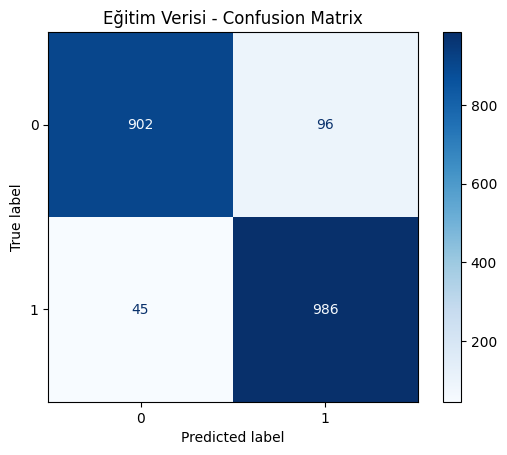

In [6]:
cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Eğitim Verisi - Confusion Matrix")
plt.show()

In [7]:
print("\nClassification Report (Eğitim Verisi):\n")
print(classification_report(y_train, y_pred_train))


Classification Report (Eğitim Verisi):

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       998
           1       0.91      0.96      0.93      1031

    accuracy                           0.93      2029
   macro avg       0.93      0.93      0.93      2029
weighted avg       0.93      0.93      0.93      2029



/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


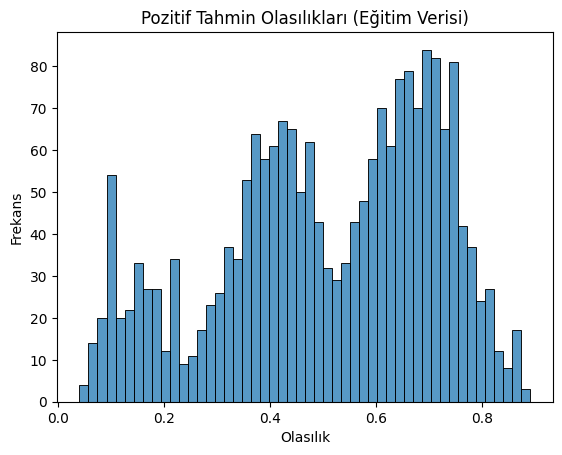

In [8]:
y_prob_train = model.predict_proba(X_train)[:,1]
sns.histplot(y_prob_train, bins=50)
plt.title("Pozitif Tahmin Olasılıkları (Eğitim Verisi)")
plt.xlabel("Olasılık")
plt.ylabel("Frekans")
plt.show()


In [9]:
test_pred = model.predict(X_test)

In [10]:
submission = pd.DataFrame({
    "id": test.index,  # test["id"] yerine
    "rule_violation": test_pred
})
submission.to_csv("submission.csv", index=False)